<a href="https://colab.research.google.com/github/cppel/dz/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1. Использование предобученной модели

1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNetV2()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

14536120/14536120 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

{'name': 'mobilenetv2_1.00_224',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'Conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'Conv1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'c


1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в списке, и сохраните их представление в список images

In [ ]:
from urllib.request import urlopen
import cv2
import numpy as np

imageUrls = [
    # 1. hornbill
    "https://upload.wikimedia.org/wikipedia/commons/e/ee/Great_hornbill_Photograph_by_Shantanu_Kuveskar.jpg",
    # 2. water snake
    "https://upload.wikimedia.org/wikipedia/commons/1/13/Pelamis_platura%2C_Costa_Rica.jpg",
    # 3. wombat
    "https://upload.wikimedia.org/wikipedia/commons/1/18/Vombatus_ursinus_-Maria_Island_National_Park.jpg",
    # 4. agama
    "https://upload.wikimedia.org/wikipedia/commons/8/87/Red-headed_rock_agama_%28Agama_agama%29_male.jpg",
    # 5. bulbul
    "https://upload.wikimedia.org/wikipedia/commons/8/87/Brown-eared_Bulbul_1.jpg"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.
(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов.

In [ ]:
def predict(images):
    normalized_images = normalize(images, (224, 224, 3))
    preprcessed_images = keras.applications.mobilenet_v2.preprocess_input(normalized_images)
    prediction = model.predict(preprcessed_images)
    return prediction

In [ ]:
def print_predict(preds, image):
    output = image.copy()

    height = 30
    margin = 30
    for pred in preds:
        height += margin
        text = "{}: {:.2f}%".format(pred[1], pred[2] * 100)
        _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

35363/35363 [==============================] - 0s 0us/step


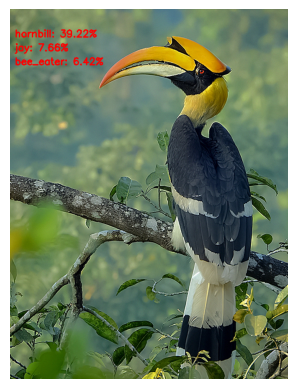

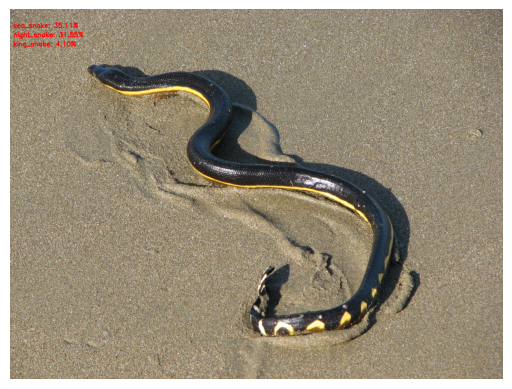

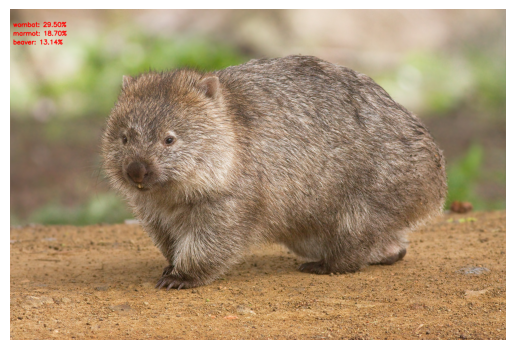

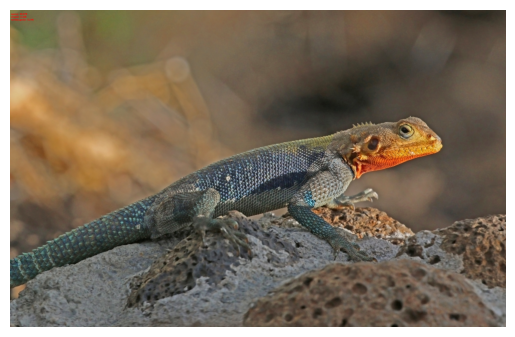

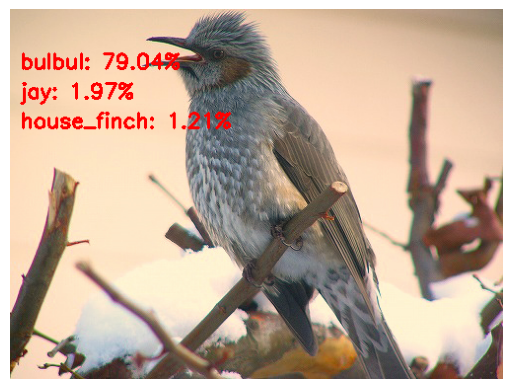

In [ ]:
predictions = predict(images)
predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)
for i, preds in enumerate(predictions):
    print_predict(preds, images[i])

Задание 2. Использование обученной модели для работы со своим датасетом
2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку
Датасет - https://www.kaggle.com/datasets/ichhadhari/indian-birds, из него взято пять классов Cattle Egret, Common Kingfisher, Indian Grey Hornbill, Sarus Crane, White Breasted Waterhen

In [2]:
img_height,img_width=192,192
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/test/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/test/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 7500 files belonging to 5 classes.
Using 6000 files for training.
Found 7500 files belonging to 5 classes.
Using 1500 files for validation.
['Cattle-Egret', 'Common-Kingfisher', 'Indian-Grey-Hornbill', 'Sarus-Crane', 'White-Breasted-Waterhen']


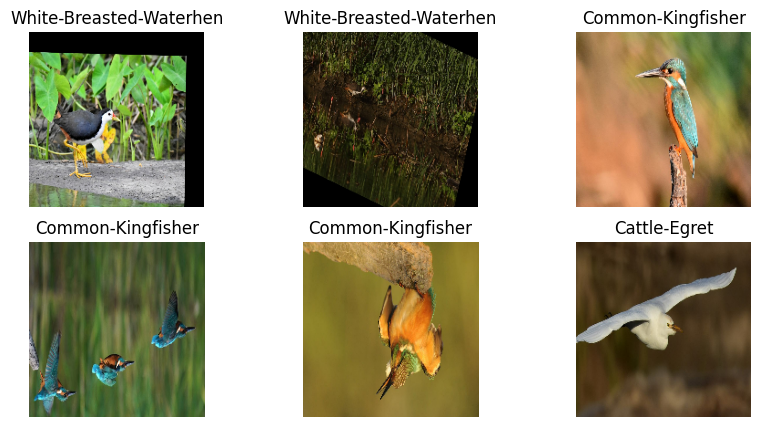

In [3]:
# Отобразим часть данных из обучающей выборки
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

2.3. Обучение своей модели на основе предобученной модели MobileNetV2
Создадим модель на основе MobileNetV2 и добавим к ней слои, при этом слои модели не будем подвергать изменению при обучении

In [4]:
base_model_1 = keras.applications.MobileNetV2(include_top=False,
                   input_shape=(192, 192, 3), 
                   pooling='avg', 
                   weights='imagenet')
base_model_1.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [5]:
base_model_1.trainable = False

model_1 = Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(5, activation='softmax'))
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_1.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 192, 192, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenetv2_1.00_192_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenetv2_1.00_192',
    'trainable': False,
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 192, 192, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_1'},
      'name': 'input_1',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'Conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_name

In [6]:
epochs=15
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/15
188/188 [==============================] - 917s 5s/step - loss: 0.9581 - accuracy: 0.6413 - val_loss: 0.8012 - val_accuracy: 0.7000
Epoch 2/15
188/188 [==============================] - 46s 239ms/step - loss: 0.7217 - accuracy: 0.7365 - val_loss: 0.7254 - val_accuracy: 0.7313
Epoch 3/15
188/188 [==============================] - 48s 248ms/step - loss: 0.6322 - accuracy: 0.7775 - val_loss: 0.6834 - val_accuracy: 0.7427
Epoch 4/15
188/188 [==============================] - 49s 253ms/step - loss: 0.5811 - accuracy: 0.7928 - val_loss: 0.6303 - val_accuracy: 0.7813
Epoch 5/15
188/188 [==============================] - 47s 244ms/step - loss: 0.5382 - accuracy: 0.8067 - val_loss: 0.6113 - val_accuracy: 0.7873
Epoch 6/15
188/188 [==============================] - 48s 248ms/step - loss: 0.5083 - accuracy: 0.8193 - val_loss: 0.6173 - val_accuracy: 0.7707
Epoch 7/15
188/188 [==============================] - 49s 251ms/step - loss: 0.4715 - accuracy: 0.8372 - val_loss: 0.5962 - val_accu

2.4. Визуализация процесса обучения модели

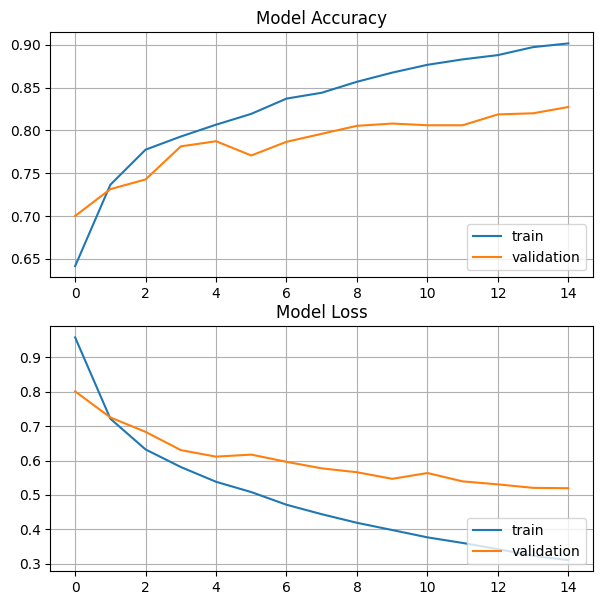

In [7]:
fig, (modelAcc, modelLoss) = plt.subplots(2)
fig.set_figwidth(7)
fig.set_figheight(7)

modelAcc.set_title('Model Accuracy')
modelAcc.grid()
modelAcc.plot(history_1.history['accuracy'])
modelAcc.plot(history_1.history['val_accuracy'])
modelAcc.legend(['train', 'validation'], loc="lower right")

modelLoss.set_title('Model Loss')
modelLoss.grid()
modelLoss.plot(history_1.history['loss'])
modelLoss.plot(history_1.history['val_loss'])
modelLoss.legend(['train', 'validation'], loc="lower right")


plt.show()

Также создадим модель, у которой несколько последних слоев будут обучаемыми

In [8]:
base_model_2 = keras.applications.MobileNetV2(include_top=False,
                   input_shape=(192, 192, 3), 
                   pooling='avg', 
                   weights='imagenet')

for layer in base_model_2.layers[:-12]:
    layer.trainable = False

model_2 = Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(5, activation='softmax'))
model_2.compile(optimizer=Adam(learning_rate=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_2.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 192, 192, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenetv2_1.00_192_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenetv2_1.00_192',
    'trainable': True,
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 192, 192, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_2'},
      'name': 'input_2',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'Conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_nam

In [9]:
# Обучим модель
epochs=25
history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/25
188/188 [==============================] - 54s 259ms/step - loss: 1.2018 - accuracy: 0.5298 - val_loss: 1.3979 - val_accuracy: 0.3967
Epoch 2/25
188/188 [==============================] - 50s 259ms/step - loss: 0.8727 - accuracy: 0.6900 - val_loss: 1.2548 - val_accuracy: 0.4847
Epoch 3/25
188/188 [==============================] - 50s 259ms/step - loss: 0.7482 - accuracy: 0.7397 - val_loss: 1.1385 - val_accuracy: 0.5473
Epoch 4/25
188/188 [==============================] - 48s 249ms/step - loss: 0.6606 - accuracy: 0.7668 - val_loss: 1.0277 - val_accuracy: 0.6040
Epoch 5/25
188/188 [==============================] - 50s 259ms/step - loss: 0.6012 - accuracy: 0.7908 - val_loss: 0.9363 - val_accuracy: 0.6507
Epoch 6/25
188/188 [==============================] - 48s 250ms/step - loss: 0.5622 - accuracy: 0.8072 - val_loss: 0.8512 - val_accuracy: 0.6987
Epoch 7/25
188/188 [==============================] - 49s 255ms/step - loss: 0.5144 - accuracy: 0.8258 - val_loss: 0.7882 - val_ac

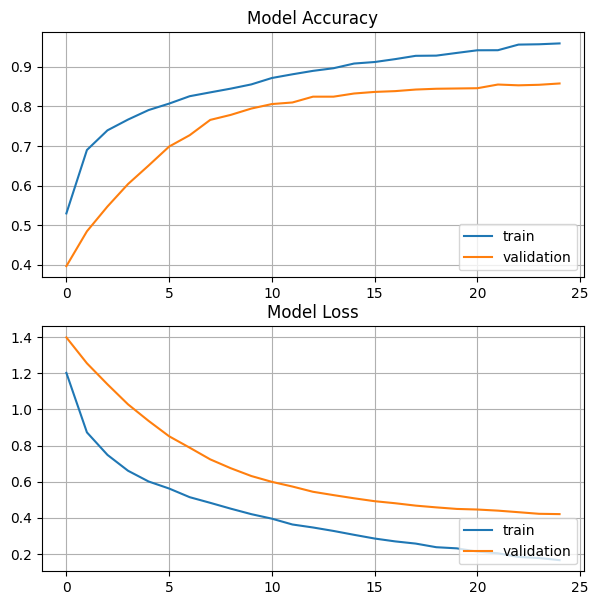

In [10]:
# Графики обучения
fig, (modelAcc, modelLoss) = plt.subplots(2)
fig.set_figwidth(7)
fig.set_figheight(7)

modelAcc.set_title('Model Accuracy')
modelAcc.grid()
modelAcc.plot(history_2.history['accuracy'])
modelAcc.plot(history_2.history['val_accuracy'])
modelAcc.legend(['train', 'validation'], loc="lower right")

modelLoss.set_title('Model Loss')
modelLoss.grid()
modelLoss.plot(history_2.history['loss'])
modelLoss.plot(history_2.history['val_loss'])
modelLoss.legend(['train', 'validation'], loc="lower right")


plt.show()

2.5. Подготовьте набор проверочных данных см. Задание №1 (п. 1.2, 1.3, 1.4)

In [11]:
from urllib.request import urlopen
import cv2
import numpy as np

correct_answers = ['Cattle-Egret', 'Common-Kingfisher', 'Indian-Grey-Hornbill', 'Sarus-Crane', 'White-Breasted-Waterhen']
imageUrls = [
    # 1. Cattle Egret
    "https://www.birdspot.co.uk/wp-content/uploads/2019/12/cattle-egret.jpg",
    # 2. Common Kingfisher
    "https://i.pinimg.com/originals/b4/b0/30/b4b030af3ef775b3d4b1939e5578fb8f.jpg",
    # 3. Indian Grey Hornbill
    "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Indian_Grey_Hornbill_Ocyceros_birostris_female_by_Dr._Raju_Kasambe_DSCN4231_%287%29.jpg/1200px-Indian_Grey_Hornbill_Ocyceros_birostris_female_by_Dr._Raju_Kasambe_DSCN4231_%287%29.jpg",
    # 4. Sarus Crane
    "https://www.francisjtaylor.co.uk/wp-content/uploads/2020/05/73I4589-copy.jpg",
    # 5. White Breasted Waterhen
    "https://i.pinimg.com/originals/74/87/e1/7487e19a9092c90c02c8c3ac0bbf4903.jpg"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

In [12]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

In [13]:
def predict(models, images):
    normalized_images = normalize(images, (192, 192, 3))
    models_predictions = []
    for model in models: 
        prediction = model.predict(normalized_images)
        models_predictions.append(prediction)
    return models_predictions

In [14]:
def decode_prediction(prediction, class_names):
    max_index = np.argmax(prediction)
    max_indices = np.argpartition(prediction, -3)[-3:]
    top3 = []
    for index in max_indices:
        top3.append([class_names[index], prediction[index]])
    return sorted(top3, key=lambda lst: lst[1], reverse=True)

In [15]:
def print_predict(class_names, models_predictions, correct_answers, image, image_index):
    output = image.copy()

    height = 20
    margin = 30
    models_margin = 40
    _ = cv2.putText(output, f'Correct Answer: {correct_answers[image_index]}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    for i, model_predition in enumerate(models_predictions):
        height += models_margin
        _ = cv2.putText(output, f'Model #{i+1}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
        predictions = decode_prediction(model_predition[image_index], class_names)
        for pred in predictions:
            height += margin
            text = "{}: {:.2f}%".format(pred[0], pred[1] * 100)
            _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

2.6. Организуйте вывод изображений и соответствующих им классов

1/1 [==============================] - 1s 724ms/step


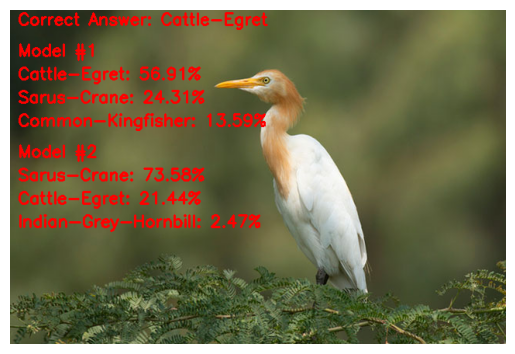

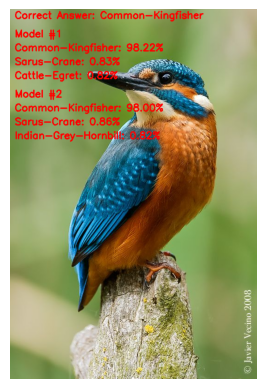

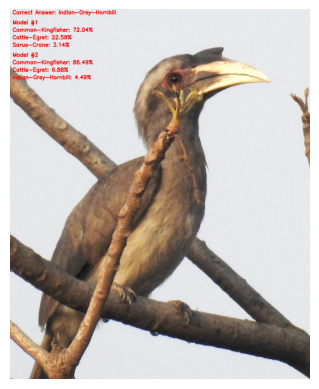

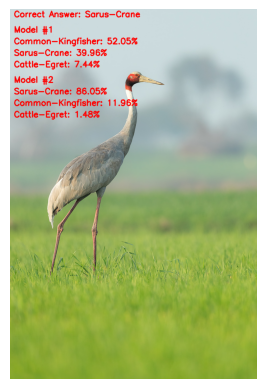

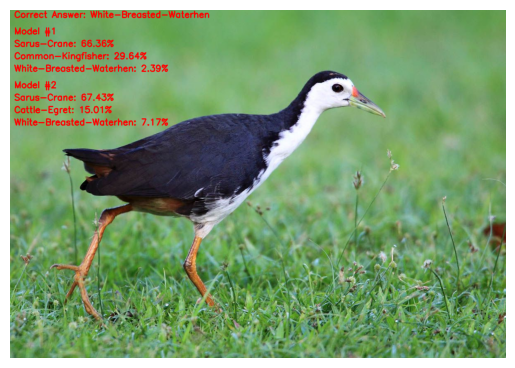

In [16]:
predictions = predict(models=[model_1, model_2], images=images)
for i, image in enumerate(images):
    print_predict(class_names, predictions, correct_answers, image, i)